## 6.6: Sourcing & Analyzing Time Series Data

### This script contains the following:
1. Import libraries and data
2. Subsetting, wrangling, and cleaning time-series data
3. Time-series analysis: decomposition
4. 
5. 

### 1. Import Libraries and Data

In [70]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [71]:
# Define Path
path = r'C:\Users\sandu\Desktop\Data Immersion&Analytics\6.ADV ANALYTICS\3 Data\Original Data'
path1 =r'C:\Users\sandu\Desktop\Data Immersion&Analytics\6.ADV ANALYTICS\4 Analytics\Visualizations'

In [72]:
# Import Data
data = pd.read_csv(os.path.join(path,'tour_occ_mnor__custom_3522407_linear.csv'),  index_col=0)

In [73]:
# Display details
data.head(10)

,LAST UPDATE,freq,accomunit,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
DATAFLOW,,,,,,,,
ESTAT:TOUR_OCC_MNOR(1.0),12/10/2023 23:00,Monthly,Bedplaces,Percentage,Germany,2014-07,48.2,NaN
ESTAT:TOUR_OCC_MNOR(1.0),12/10/2023 23:00,Monthly,Bedrooms,Percentage,Germany,2014-07,63.2,NaN
ESTAT:TOUR_OCC_MNOR(1.0),12/10/2023 23:00,Monthly,Bedplaces,Percentage,Germany,2014-08,52.8,NaN
ESTAT:TOUR_OCC_MNOR(1.0),12/10/2023 23:00,Monthly,Bedrooms,Percentage,Germany,2014-08,64.8,NaN
ESTAT:TOUR_OCC_MNOR(1.0),12/10/2023 23:00,Monthly,Bedplaces,Percentage,Germany,2014-09,50.7,NaN
ESTAT:TOUR_OCC_MNOR(1.0),12/10/2023 23:00,Monthly,Bedrooms,Percentage,Germany,2014-09,70.8,NaN
ESTAT:TOUR_OCC_MNOR(1.0),12/10/2023 23:00,Monthly,Bedplaces,Percentage,Germany,2014-10,46.8,NaN
ESTAT:TOUR_OCC_MNOR(1.0),12/10/2023 23:00,Monthly,Bedrooms,Percentage,Germany,2014-10,66.1,NaN
ESTAT:TOUR_OCC_MNOR(1.0),12/10/2023 23:00,Monthly,Bedplaces,Percentage,Germany,2014-11,37.0,NaN


### 2. Subsetting, Data Wrangling & cleaning time-series

#### Create a subset

In [74]:
# Keep just needed columns
df = data[['TIME_PERIOD', "OBS_VALUE"]]

In [75]:
df.head()

,TIME_PERIOD,OBS_VALUE
DATAFLOW,,
ESTAT:TOUR_OCC_MNOR(1.0),2014-07,48.2
ESTAT:TOUR_OCC_MNOR(1.0),2014-07,63.2
ESTAT:TOUR_OCC_MNOR(1.0),2014-08,52.8
ESTAT:TOUR_OCC_MNOR(1.0),2014-08,64.8
ESTAT:TOUR_OCC_MNOR(1.0),2014-09,50.7


In [76]:
# Rename columns
df = df.rename(columns = {'TIME_PERIOD':'Date', 'OBS_VALUE': 'occ_rate'})

In [77]:
# SET date AS INDEX
data_2 = df.set_index("Date")
data_2.index = pd.to_datetime(data_2.index)
data_2.head()

,occ_rate
Date,
2014-07-01,48.2
2014-07-01,63.2
2014-08-01,52.8
2014-08-01,64.8
2014-09-01,50.7


#### Line Chart of Data

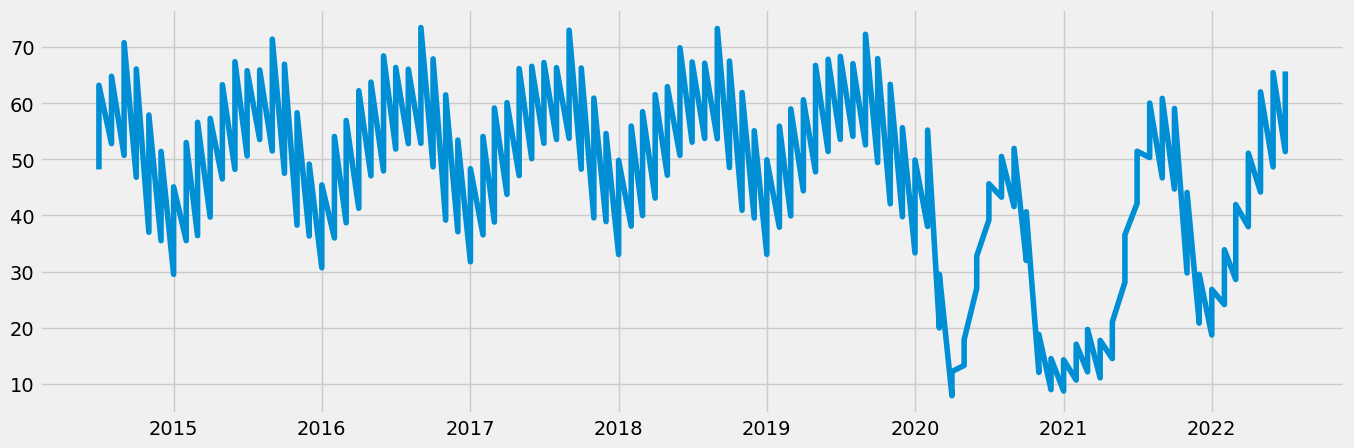

In [78]:
plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here.

plt.plot(data_2)

In [79]:
# Reset index to use the "Date" column as a filter
data_3 = data_2.reset_index()

In [110]:
data_3.head()

,Date,occ_rate
0,2014-07-01,48.2
1,2014-07-01,63.2
2,2014-08-01,52.8
3,2014-08-01,64.8
4,2014-09-01,50.7


In [150]:
# Creating subset of data with relevant time only
data_sub = data_3.loc[(data_3['Date'] >= '2014-07-01') & (data_3['Date'] < '2022-07-01')]

In [151]:
# set the 'Date' column as the index
from datetime import date
data_sub['datetime'] = pd.to_datetime(data_sub['Date'], format='%Y') # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,occ_rate
datetime,
2014-07-01,48.2
2014-07-01,63.2
2014-08-01,52.8
2014-08-01,64.8
2014-09-01,50.7


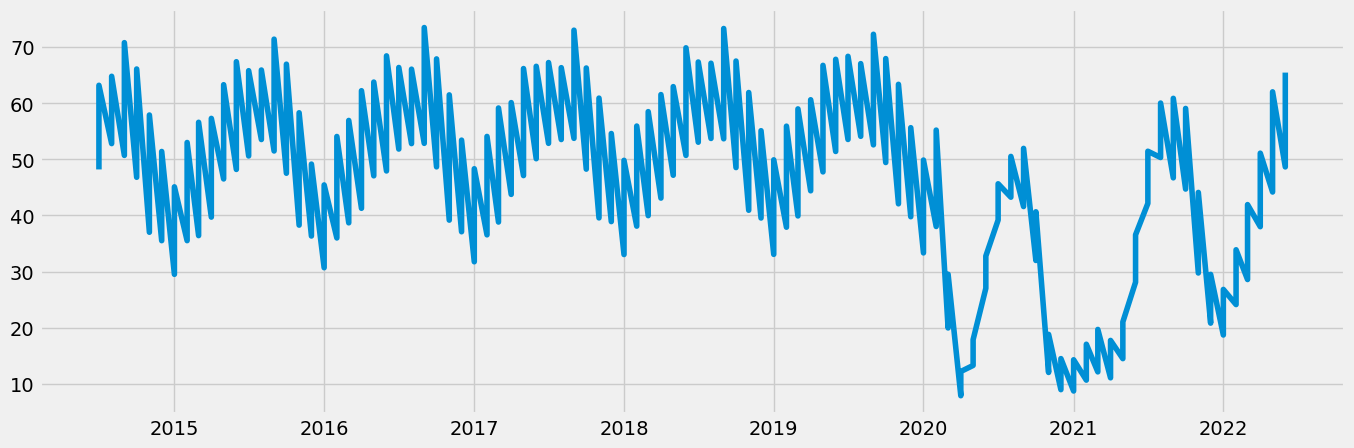

In [152]:
# plot the data
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(data_sub)

#### Check for duplicates and missing values

In [153]:
# Check for missing values
data_sub.isnull().sum() 
# No missing values

occ_rate    0
dtype: int64

In [154]:
data_sub.shape

(192, 1)

In [155]:
# Check for duplicates
dups = data_sub.duplicated()
dups.sum()

# 9 duplicates found

9

In [156]:
# Drop Duplicates from the data
data_sub.drop_duplicates(keep=False)

,occ_rate
datetime,
2014-07-01,63.20
2014-08-01,64.80
2014-09-01,70.80
2014-10-01,46.80
2014-10-01,66.10
...,...
2022-04-01,51.10
2022-05-01,44.17
2022-05-01,62.03


In [157]:
data_sub.dropna()

,occ_rate
datetime,
2014-07-01,48.20
2014-07-01,63.20
2014-08-01,52.80
2014-08-01,64.80
2014-09-01,50.70
...,...
2022-04-01,51.10
2022-05-01,44.17
2022-05-01,62.03


### 3. Time-series analysis: decomposition

In [158]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [142]:
data_sub.index = pd.date_range(start='2014-07-01', end='2022-07-01', freq='D')
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

ValueError: Length mismatch: Expected axis has 192 elements, new values have 2923 elements

NOTE: Tried setting dates, tried parameter none, tried without, still I could not make the plot for all years. Tried after the below and it gave me for 2010. I will make info about this year

In [134]:
data_sub.index = pd.date_range(start='2010-01-01', periods=len(data_sub), freq='D')
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [136]:
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [148]:
from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18,7

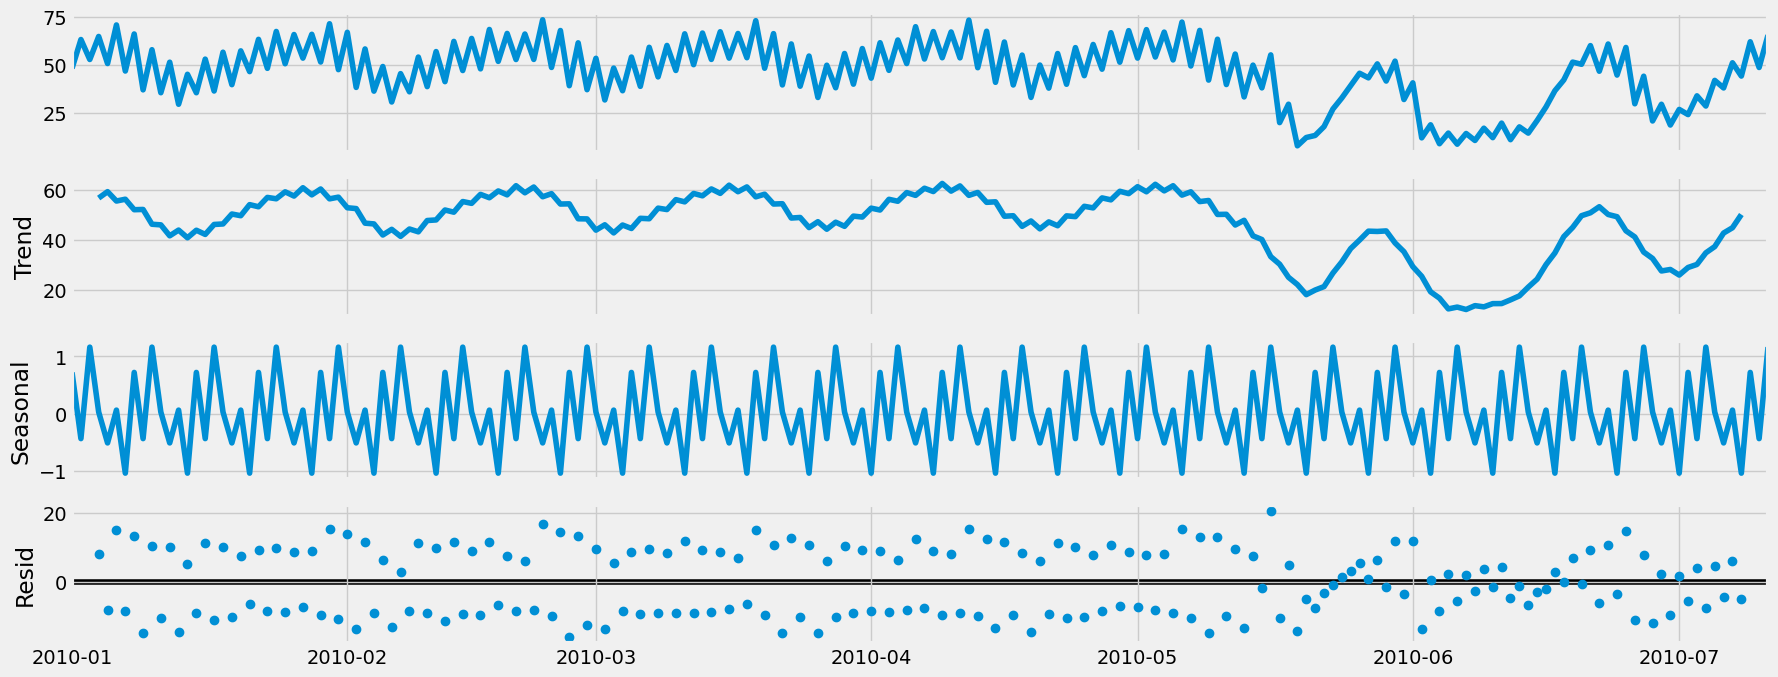

In [149]:
decomposition.plot()
plt.show()

NOTE:
trend: positive trend with variances
seasonality: can't exactly say being just on 2010
I would expect this data to be non-stationary because there is a clear upwards trend.

There appears to be some noise from due to data fluctuations.

### 4. Stationarity Test

#### a. Dickey-Fuller Test

In [159]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.
from statsmodels.tsa.stattools import adfuller
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationary Test:')
    test = adfuller(timeseries, autolag ='AIC')
    result = pd.Series(test[0:4], index=['Test Statistics',
                                        'p_value',
                                        'Number of lags Used',
                                        'Number of Observation Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print(result)
    
    # Apply the test using the function on the time series
dickey_fuller(data_sub['occ_rate'])

Dickey-Fuller Stationary Test:
Test Statistics                -2.039141
p_value                         0.269679
Number of lags Used            11.000000
Number of Observation Used    180.000000
Critical Value (1%)            -3.467211
Critical Value (5%)            -2.877735
Critical Value (10%)           -2.575403
dtype: float64


##### H0 = Presence of a unit root (non-stationary)
#####  HA = Unit root present (stationary)
The test statistic is lower than all of the critical values, so I cannot reject the null hypothesis.
This data is non-stationary.

#### b. Autocorrelation Test

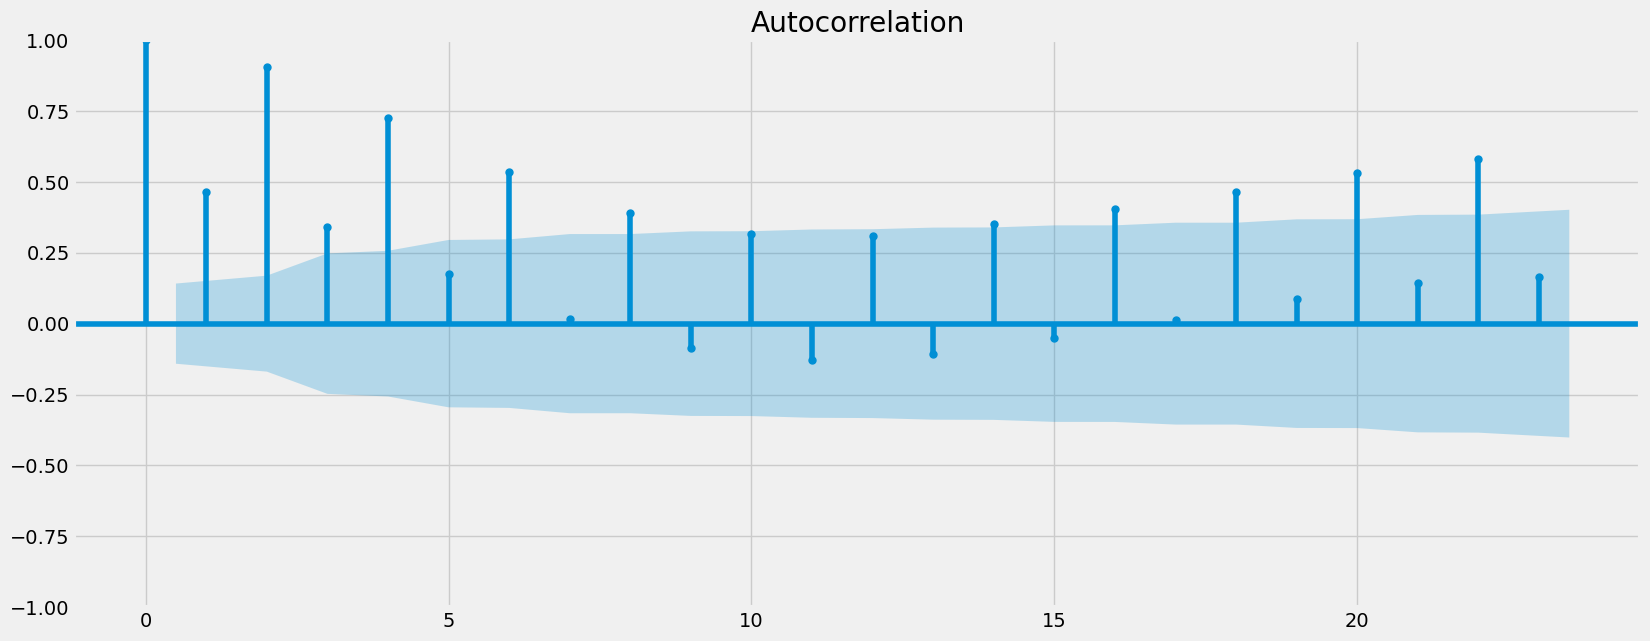

In [160]:
# Check out for autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_sub)
plt.show()

I count 12 lines outside of the confidence interval and 12 lines inside. So about half of the lags are correlated with each other and this demonstrates non-stationary data.

### 5. Stationarizing the Data

In [192]:
data_diff = data_sub - data_sub.shift(1) 
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [193]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [194]:
data_diff.head()

,occ_rate
datetime,
2014-07-01,15.0
2014-08-01,-10.4
2014-08-01,12.0
2014-09-01,-14.1
2014-09-01,20.1


In [195]:
data_diff.columns

Index(['occ_rate'], dtype='object')

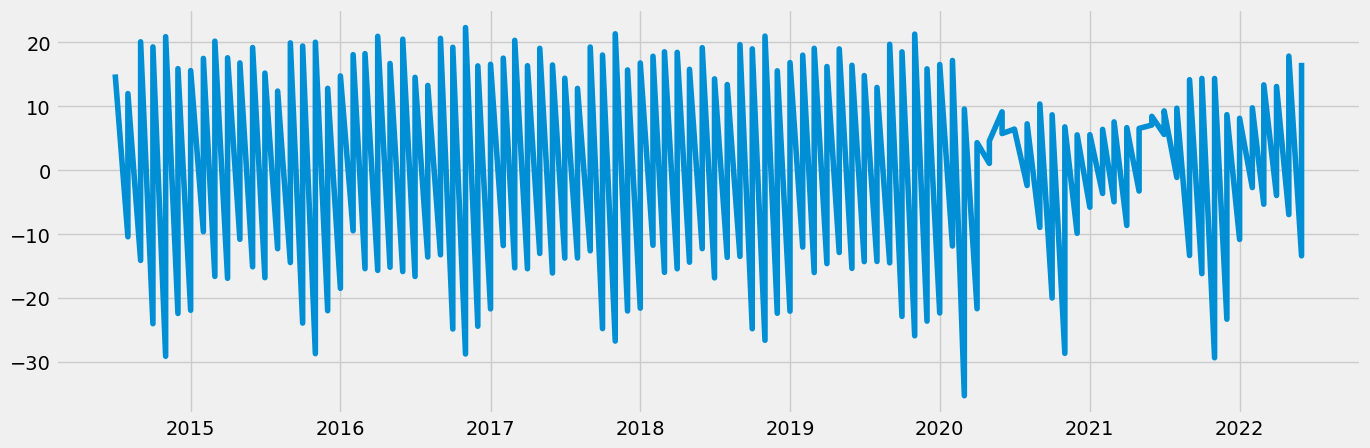

In [196]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [197]:
dickey_fuller(data_diff)

Dickey-Fuller Stationary Test:
Test Statistics              -6.115610e+00
p_value                       9.110353e-08
Number of lags Used           1.000000e+01
Number of Observation Used    1.800000e+02
Critical Value (1%)          -3.467211e+00
Critical Value (5%)          -2.877735e+00
Critical Value (10%)         -2.575403e+00
dtype: float64


NOTE: The test statistic is lower than all critical values but the p-value is still not.

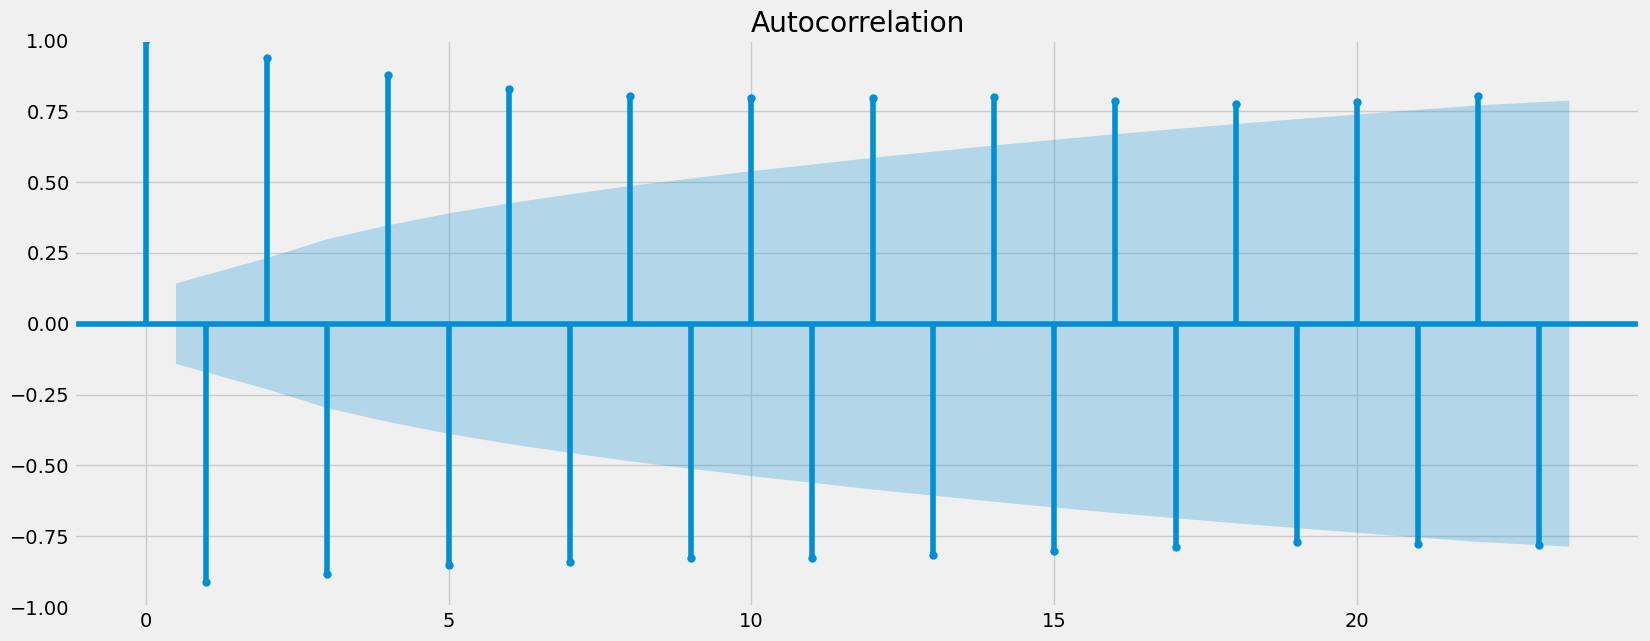

In [167]:
plot_acf(data_diff)
plt.show()
